## Context
Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective
In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

1. Facilitate the process of visa approvals.
2. Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

## Data Description
The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* **case_id**: ID of each visa application
* **continent**: Information of continent the employee
* **education_of_employee**: Information of education of the employee
* **has_job_experience**: Does the employee has any job experience? Y= Yes; N = No
* **requires_job_training**: Does the employee require any job training? Y = Yes; N = No
* **no_of_employees**: Number of employees in the employer's company
* **yr_of_estab**: Year in which the employer's company was established
* **region_of_employment**: Information of foreign worker's intended region of employment in the US.
* **prevailing_wage**: Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* **unit_of_wage**: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* **full_time_position**: Is the position of work full-time? Y = Full-Time Position; N = Part-Time Position
* **case_status**: Flag indicating if the Visa was certified or denied

## Import Necessary Libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# reading/manipulating data
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
from sklearn import tree

%matplotlib inline
import seaborn as sns

sns.set(color_codes=True)

# suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# splitting data
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)
from sklearn.model_selection import GridSearchCV

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier, plot_tree
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

<IPython.core.display.Javascript object>

## Load the data and check shape/info

In [2]:
# read csv file
data = pd.read_csv("EasyVisa.csv")

# make a copy of the dataset so we don't make changes to the original
df = data.copy()

# take a look at the data
df.sample(n=15)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
13228,EZYV13229,Europe,High School,Y,N,1808,1976,West,56320.1100,Year,Y,Denied
24928,EZYV24929,Asia,Bachelor's,N,N,2613,1995,West,76517.6900,Year,Y,Denied
19108,EZYV19109,Europe,Doctorate,Y,N,629,1994,South,16449.1200,Year,Y,Certified
5462,EZYV5463,Asia,Master's,N,Y,3415,1991,South,104348.3100,Year,Y,Certified
484,EZYV485,Asia,Master's,Y,N,3176,2003,West,132453.4300,Year,Y,Certified
2598,EZYV2599,Asia,High School,Y,N,21708,2008,South,115528.5300,Year,Y,Denied
13736,EZYV13737,Asia,Bachelor's,N,N,406,1996,Northeast,65105.0700,Year,Y,Certified
23369,EZYV23370,North America,Doctorate,Y,Y,3619,1999,West,64987.9700,Year,Y,Certified
16624,EZYV16625,North America,Bachelor's,N,N,2734,1979,Northeast,603.4404,Hour,Y,Certified
2481,EZYV2482,Asia,Bachelor's,N,N,774,1994,West,208805.2400,Year,Y,Denied


<IPython.core.display.Javascript object>

In [3]:
# view shape of dataset
df.shape

(25480, 12)

<IPython.core.display.Javascript object>

In [4]:
# view info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


<IPython.core.display.Javascript object>

* There are 25480 rows and 12 columns
* 2 int64 columns and 1 float64 column
* 9 object columns, some of which can be ordinal or binary data
* id column will not be necessary for classification
* all entries are non-null for each column

In [5]:
# double check for null values
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

<IPython.core.display.Javascript object>

* no missing values

In [6]:
# check for duplicate rows
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [7]:
# check for duplicate case_id
df["case_id"].duplicated().sum()

0

<IPython.core.display.Javascript object>

* no duplicated rows or case IDs

In [8]:
# check descriptive statistics of the data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

* `case_id` will be dropped for the model, as each case has a unique ID
* There are 6 continents from which there are visa applicants, and most applicants are from Asia
* There are 4 levels of education, and approximately 2 in 5 applicants have a bachelor's degree
* Most applicants do have job experience, but about 2 in 5 applicants do not have any job experience
* A large majority of job positions do not require job training
* Curiously, there are companies that have a negative number of employees
* `no_of_employees` is positively skewed with approx 75% of the observations under 3500 employees
* Year of extablishment ranges from 1800 to 2016, with at least 75% of observations within a 40 year span, 1976-2016
* 5 different regions of employment, most common is Northeast
* `prevailing_wage` ranges from about 2.14 to 319210.27, and is positively skewed
* There are 4 units of wage, approx 90% are Year
* Almost 90% are for full time positions
* 2 out of 3 of these cases have been certified

In [9]:
# subset of data with negative number of employees
df_neg_employees = df[df["no_of_employees"] < 0]

<IPython.core.display.Javascript object>

In [10]:
# look at a sample of subset with negative number of employees
df_neg_employees.sample(n=10)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
15600,EZYV15601,Asia,Bachelor's,N,N,-14,2014,South,24641.61,Year,Y,Denied
11493,EZYV11494,Asia,High School,Y,N,-14,1999,South,27599.35,Year,Y,Denied
16157,EZYV16158,Asia,Master's,Y,N,-11,1994,South,62681.25,Year,Y,Certified
6634,EZYV6635,Asia,Bachelor's,Y,N,-26,1923,West,5247.32,Year,Y,Denied
23476,EZYV23477,Europe,Master's,Y,N,-11,2000,West,95072.75,Year,Y,Denied
21760,EZYV21761,Asia,Bachelor's,Y,N,-25,2000,West,100463.58,Year,Y,Certified
9872,EZYV9873,Europe,Master's,Y,N,-26,1996,South,37397.05,Year,Y,Certified
23186,EZYV23187,Asia,Master's,N,Y,-11,2007,Midwest,120195.35,Year,Y,Certified
245,EZYV246,Europe,Master's,N,N,-25,1980,Northeast,39452.99,Year,Y,Certified
21255,EZYV21256,North America,High School,N,N,-25,1987,South,99405.47,Year,N,Denied


<IPython.core.display.Javascript object>

In [11]:
# shape of dataset with negative number of employees
df_neg_employees.shape

(33, 12)

<IPython.core.display.Javascript object>

* There are 33 visa applications where `no_of_employees` is negative. This appears to be an error so we will determine whether this column can be dropped or if these particular cases can be dropped without impacting the model

### Check categorical value counts

In [12]:
# view value counts of categorical/discrete columns
cat_col = [
    "continent",
    "education_of_employee",
    "has_job_experience",
    "requires_job_training",
    "region_of_employment",
    "unit_of_wage",
    "full_time_position",
    "case_status",
]
for i in cat_col:
    print(df[i].value_counts())
    print("*" * 50)

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
**************************************************
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
**************************************************
Y    14802
N    10678
Name: has_job_experience, dtype: int64
**************************************************
N    22525
Y     2955
Name: requires_job_training, dtype: int64
**************************************************
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
**************************************************
Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64
**************************************************
Y    22773
N     2707
Name: full_time_position, dty

<IPython.core.display.Javascript object>

* Asia has by far the most applicants, followed by Europe, then North America, South America, Africa, and Oceania
* Almost as many applicants have master's as bachelor's. Few have high school degree and fewer have doctorate
* About 60% have job experience while about 40% do not
* Few job require job training
* Northeast and South have the most applicants, followed by West and Midwest, and then fewest in Island
* About 90% have yearly unit of wage. About 1% are weekly and very few are monthly
* About 90% full time positions
* About 67% cerified

## EDA

### Define functions for visualization

In [13]:
# For any numerical variable, it is important to check central tendency and dispersion.
# Define a function to create a boxplot and histogram for an input variable (numerical column).
# Plot the boxplot and histogram on the same scale.
# This function definition was provided by Great Learning


def histogram_boxplot(data, feature, figsize=(12, 7), kde=True, bins=None):
    """
    Boxplot and histogram on same scale
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default True)
    bins: number of b ins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [14]:
# function to create labeled barplots provided by Great Learning


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=((count + 1) * 2, 5))
    else:
        plt.figure(figsize=((n + 1) * 2, 5))

    plt.xticks(rotation=45, fontsize=15)

    ax = sns.countplot(
        data=data,
        x=feature,
        palette="hls",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [15]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

In [16]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()


<IPython.core.display.Javascript object>

## Univariate Analysis

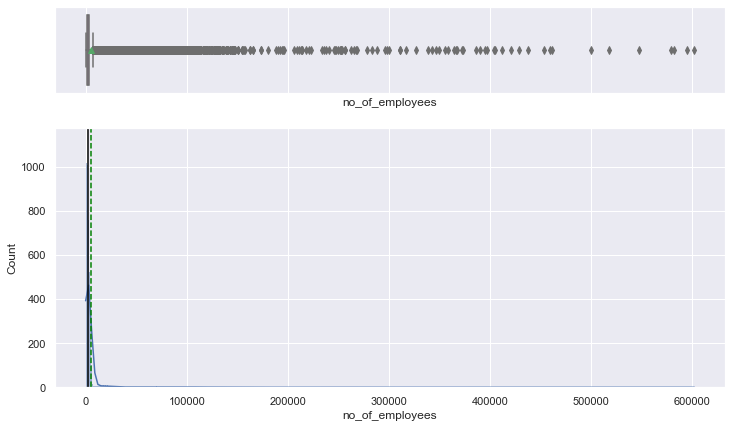

<IPython.core.display.Javascript object>

In [17]:
# plot histogram and boxplot of no_of_employees
histogram_boxplot(df, "no_of_employees")

* The number of employees is heavily skewed
* Some employers have negative number of employees

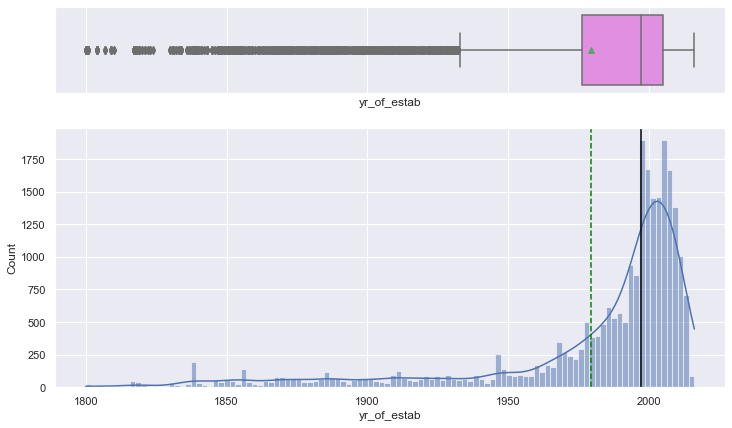

<IPython.core.display.Javascript object>

In [18]:
# plot histogram and boxplot of yr_of_estab
histogram_boxplot(df, "yr_of_estab")

* Quite skewed in negative direction
* Large majority of data is from 1930s and on
* 75% data covered by 40 years

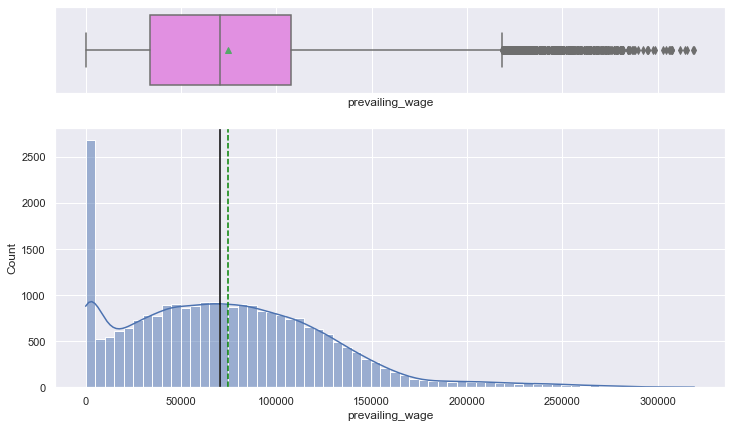

<IPython.core.display.Javascript object>

In [19]:
# plot histogram and boxplot of prevailing_wage
histogram_boxplot(df, "prevailing_wage")

* Fair number of jobs with low reported prevailing_wage
* Positive skew
* Median wage is approx what is expected for median salary

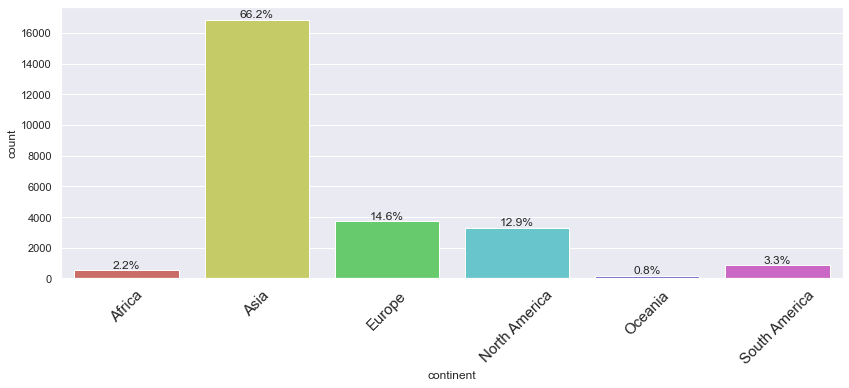

<IPython.core.display.Javascript object>

In [20]:
# plot labeled barplot of continent
labeled_barplot(df, "continent", perc=True)

* Most are from Asia and very few from Oceania
* Asia 66.2%
* Europe 14.6%
* North America 12.9%
* South America 3.3%
* Africa 2.2%
* Oceania 0.8%

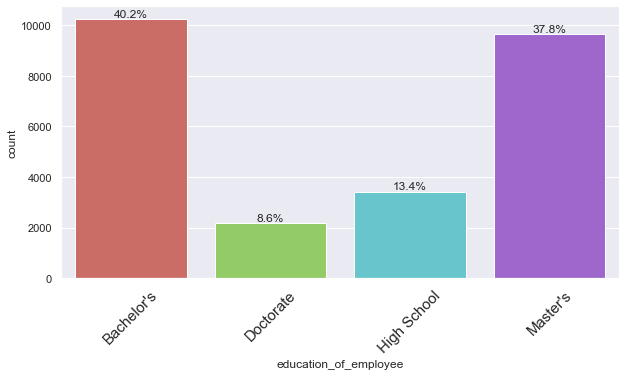

<IPython.core.display.Javascript object>

In [21]:
# plot labeled barplot of education_of_employee
labeled_barplot(df, "education_of_employee", perc=True)

* All applicants have at least high school degree
* 40.2% have bachelor's degree
* 37.8% have master's degree
* 13.4% have high school degree
* 8.6% have doctorate degree

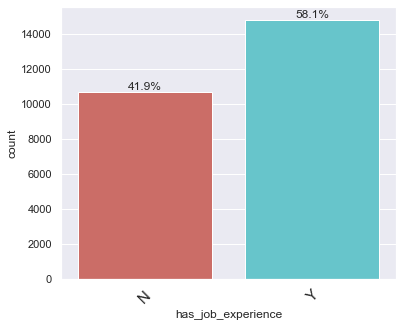

<IPython.core.display.Javascript object>

In [22]:
# plot labeled barplot of has_job_experience
labeled_barplot(df, "has_job_experience", perc=True)

* Majority have work experience

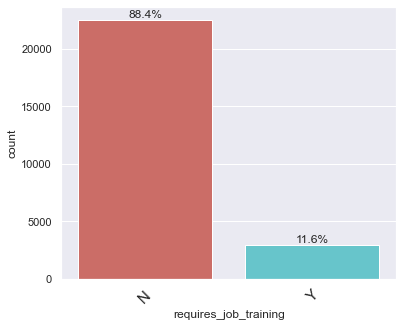

<IPython.core.display.Javascript object>

In [23]:
# plot labeled barplot of requires_job_training
labeled_barplot(df, "requires_job_training", perc=True)

* Majority of jobs do not require training

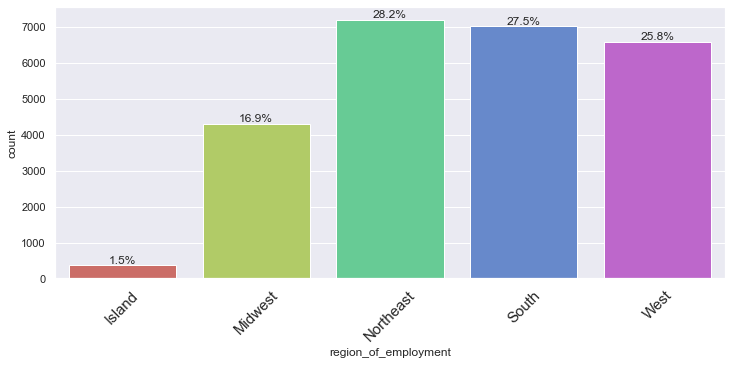

<IPython.core.display.Javascript object>

In [24]:
# plot labeled barplot of region_of_employment
labeled_barplot(df, "region_of_employment", perc=True)

* Not many for Midwest and few for Island
* 28.2% for Northeast
* 27.5% for South
* 25.8% for West
* 16.9% for Midwest
* 1.5% for Island

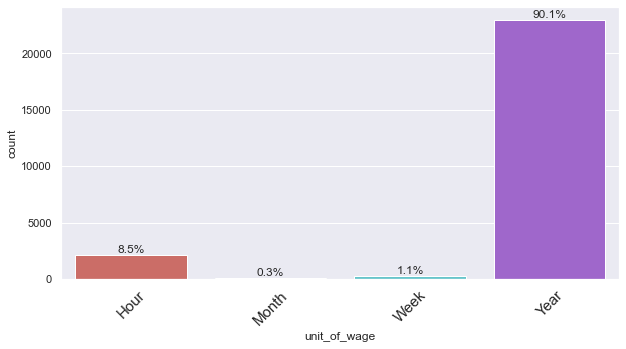

<IPython.core.display.Javascript object>

In [25]:
# plot labeled barplot for unit_of_wage
labeled_barplot(df, "unit_of_wage", perc=True)

* Largely for year unit of wage, hardly any for month
* 90.1% Year
* 8.5% Hour
* 1.1% Week
* 0.3% Month

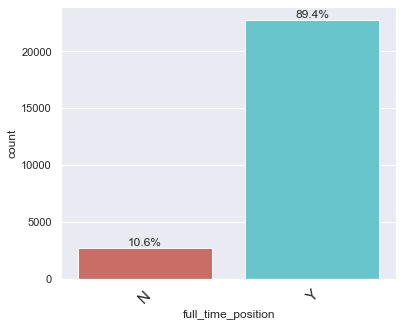

<IPython.core.display.Javascript object>

In [26]:
# plot labeled barplot for full_time_position
labeled_barplot(df, "full_time_position", perc=True)

* Majority full-time

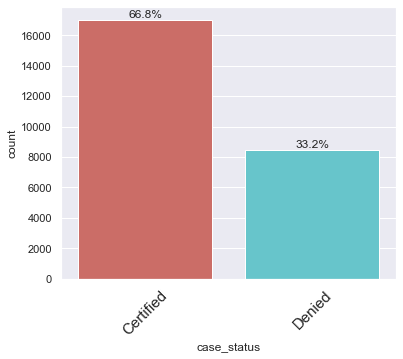

<IPython.core.display.Javascript object>

In [27]:
# plot labeled barplot for case_status
labeled_barplot(df, "case_status", perc=True)

* Majority certified (approx two-thirds certified)

## Data Preparation
* In order to see the relationship between numerical variables and case status, we will change the `case_status` variable to make it numeric

In [28]:
# create change in structure
replaceStruct = {
    "education_of_employee": {
        "High School": 1,
        "Bachelor's": 2,
        "Master's": 3,
        "Doctorate": 4,
    },
    "has_job_experience": {"N": 0, "Y": 1},
    "requires_job_training": {"N": 0, "Y": 1},
    "full_time_position": {"N": 0, "Y": 1},
    "case_status": {"Certified": 1, "Denied": 0},
}
# apply the replacement
df = df.replace(replaceStruct)
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,1,0,0,14513,2007,West,592.2029,Hour,1,0
1,EZYV02,Asia,3,1,0,2412,2002,Northeast,83425.6500,Year,1,1
2,EZYV03,Asia,2,0,1,44444,2008,West,122996.8600,Year,1,0
3,EZYV04,Asia,2,0,0,98,1897,West,83434.0300,Year,1,0
4,EZYV05,Africa,3,1,0,1082,2005,South,149907.3900,Year,1,1


<IPython.core.display.Javascript object>

In [29]:
# create backup copy of dataset to avoid having to redo all the restructuring, etc
df1 = df.copy()

<IPython.core.display.Javascript object>

## Bivariate Analysis

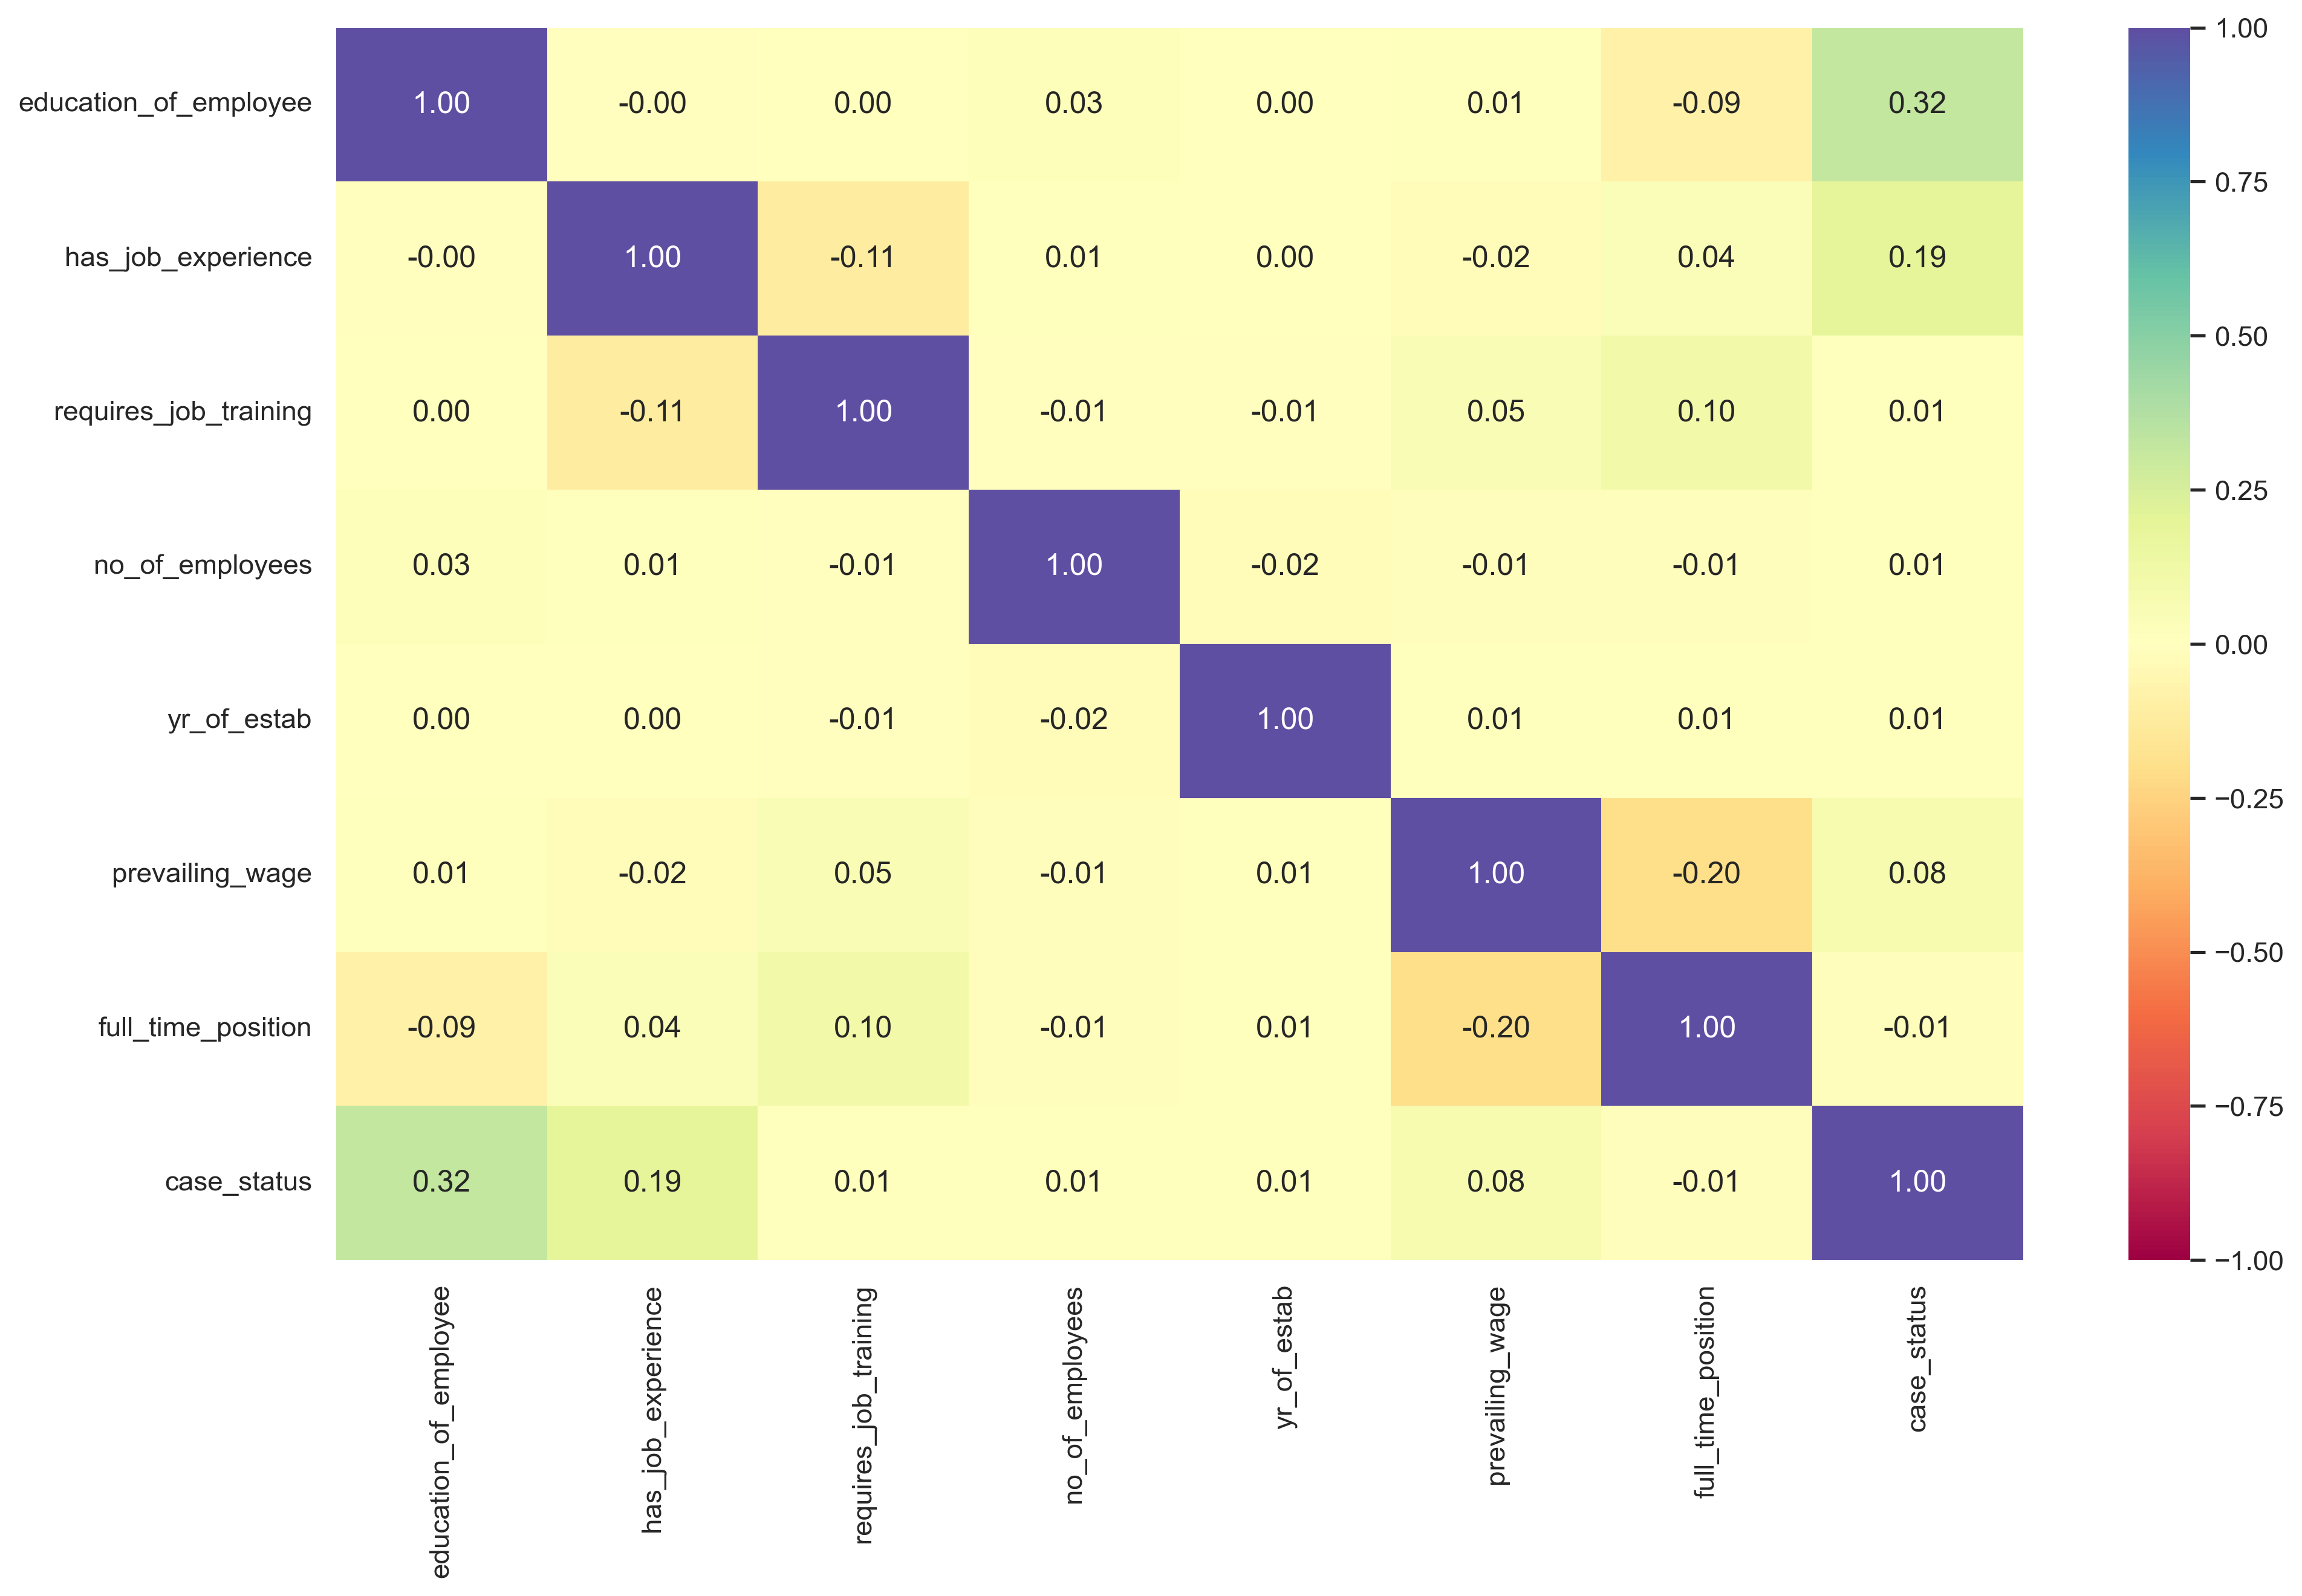

<IPython.core.display.Javascript object>

In [30]:
# make a list of numerical columns
cols_list = df.select_dtypes(include=np.number).columns.tolist()

# correlation heatmap
plt.figure(figsize=(15, 9), dpi=300)
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
# plt.savefig("corr_heatmap.jpg", bbox_inches="tight")
plt.show()

* There are no strongly correlated variables
* There is weak positive correlation between case status and education of employee so that may be worth investigating further
* There is very weak correlation between case status and job experience
* There is very weak negative correlation between full time position and  prevailing wage

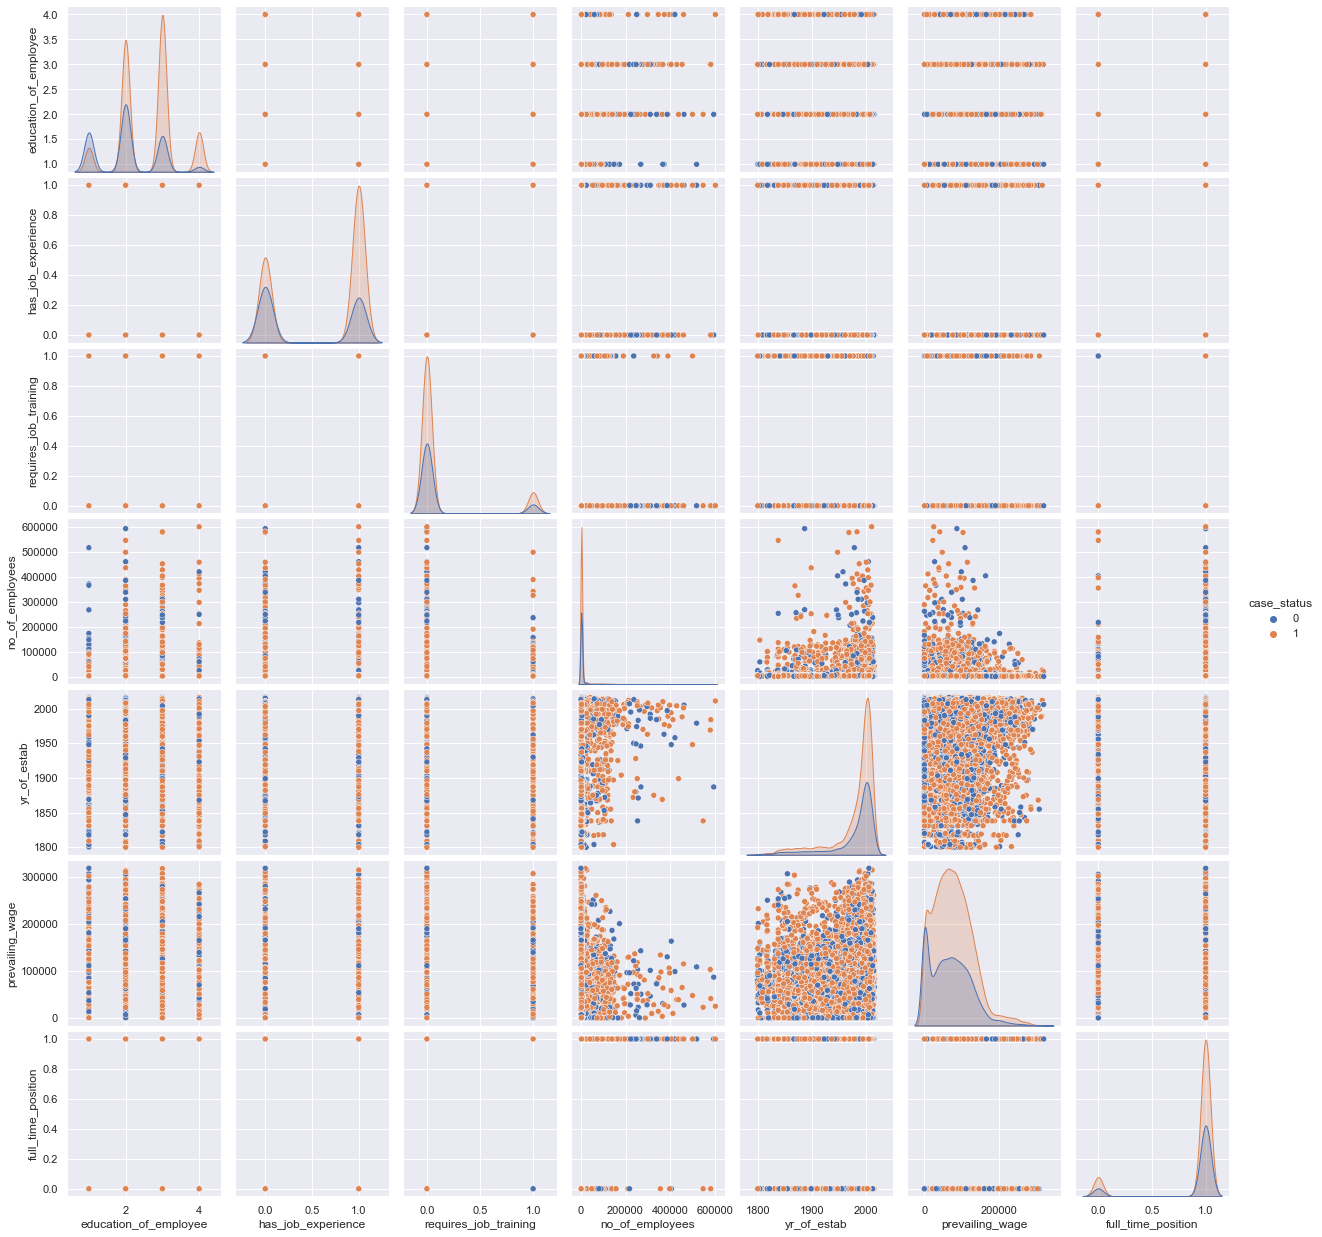

<IPython.core.display.Javascript object>

In [31]:
# plot pairwise relationships of numerical variables
sns.pairplot(data=df[cols_list], diag_kind="kde", hue="case_status")
plt.show()

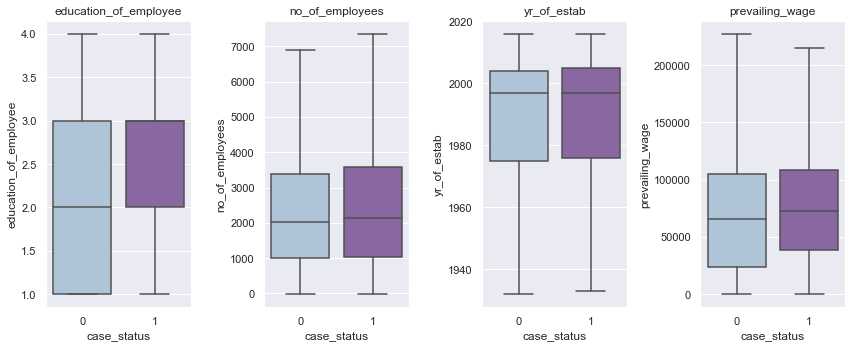

<IPython.core.display.Javascript object>

In [32]:
# plot case status vs numerical variables and education of employee
cols = ["education_of_employee", "no_of_employees", "yr_of_estab", "prevailing_wage"]
plt.figure(figsize=(12, 5))

for i, variable in enumerate(cols):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(df["case_status"], df[variable], showfliers=False, palette="BuPu")
    plt.tight_layout()
    plt.title(variable)
plt.show()

* The proportion of denied applicants decreases with higher degrees
* `no_of_employees` is similar; slightly higher for companies with certified applicants
* `yr_of_estab` is similar for companies of both certified and denied
* `prevailing_wage` is slightly higher for applicants who are certified, although range is larger and maximum is higher for applicants who are denied

case_status               0      1    All
education_of_employee                    
All                    8462  17018  25480
2                      3867   6367  10234
1                      2256   1164   3420
3                      2059   7575   9634
4                       280   1912   2192
------------------------------------------------------------------------------------------------------------------------


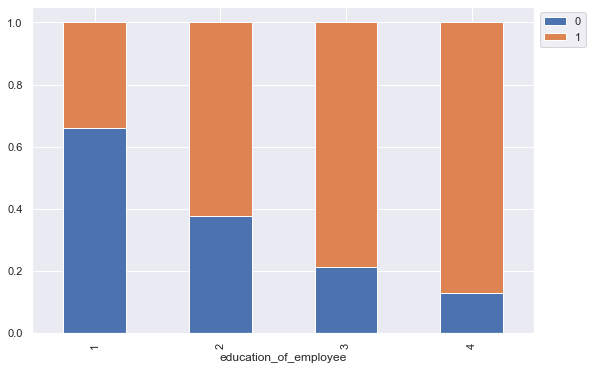

<IPython.core.display.Javascript object>

In [33]:
# plot stacked barplot of education of employee vs case status
stacked_barplot(df, "education_of_employee", "case_status")

* This supports the observation that higher degrees have a higher proportion of certified Visas
* The most common degree held by an applicant is a college degree.
* The most common degree held by a certified applicant is a master's degree

case_status       0      1    All
continent                        
All            8462  17018  25480
Asia           5849  11012  16861
North America  1255   2037   3292
Europe          775   2957   3732
South America   359    493    852
Africa          154    397    551
Oceania          70    122    192
------------------------------------------------------------------------------------------------------------------------


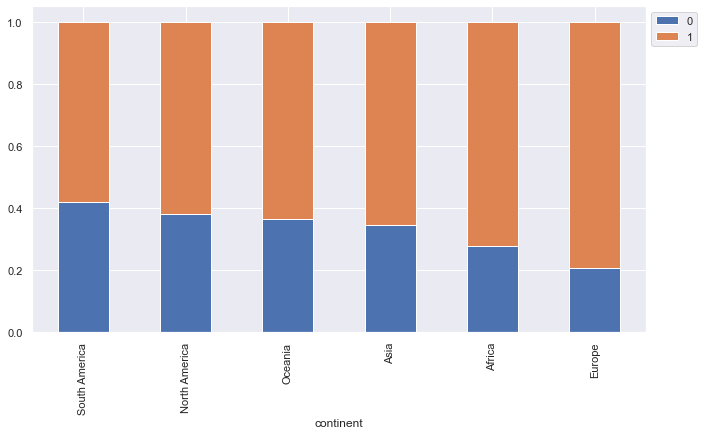

<IPython.core.display.Javascript object>

In [34]:
# plot stacked barplot of continent vs case status
stacked_barplot(df, "continent", "case_status")

* South America has the lowest proportion of certified Visas, followed by North America, Oceania, Asia, Africa, and then Europe
* Oceania has the lowest number of certified Visas, followed by Africa, South America, North America, Europe, and then Asia

case_status            0      1    All
has_job_experience                    
All                 8462  17018  25480
0                   4684   5994  10678
1                   3778  11024  14802
------------------------------------------------------------------------------------------------------------------------


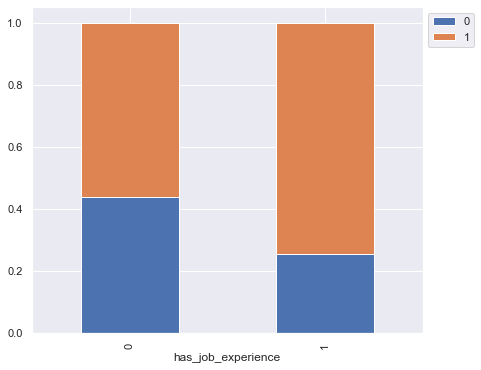

<IPython.core.display.Javascript object>

In [35]:
# plot stacked barplot of has_job_experience vs case_status
stacked_barplot(df, "has_job_experience", "case_status")

* Those with job experience have a higher proportion of certified Visas
* There are more applicants with job experience than without

case_status               0      1    All
requires_job_training                    
All                    8462  17018  25480
0                      7513  15012  22525
1                       949   2006   2955
------------------------------------------------------------------------------------------------------------------------


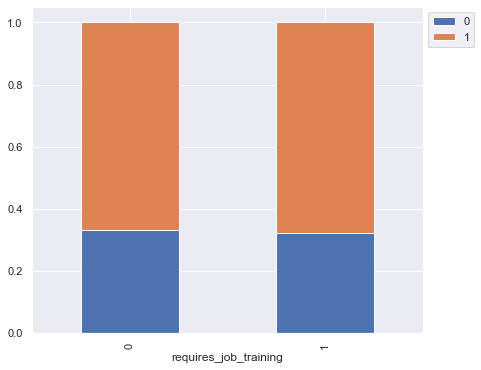

<IPython.core.display.Javascript object>

In [36]:
# plot stacked barplot of requires_job_training vs case_status
stacked_barplot(df, "requires_job_training", "case_status")

* Those applying for Visas which require training have a slightly lower proportion of certified Visas
* There are significantly fewer Visa applications for jobs requiring training, however

case_status              0      1    All
region_of_employment                    
All                   8462  17018  25480
Northeast             2669   4526   7195
West                  2486   4100   6586
South                 2104   4913   7017
Midwest               1054   3253   4307
Island                 149    226    375
------------------------------------------------------------------------------------------------------------------------


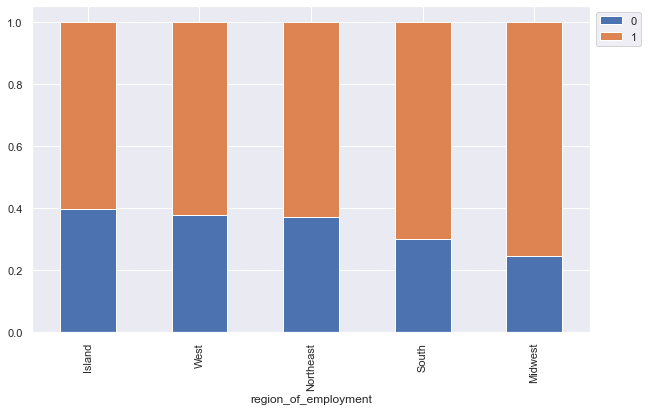

<IPython.core.display.Javascript object>

In [37]:
# plot stacked barplot of region of employment vs case status
stacked_barplot(df, "region_of_employment", "case_status")

* The Island has the lowest proportion of certified Visas, followed by the West, Northeast, South, and then Midwest
* In absolute terms, the Island has the lowest number of certified Visas, followed by the Midwest, West, Northeast, and then South

case_status      0      1    All
unit_of_wage                    
All           8462  17018  25480
Year          6915  16047  22962
Hour          1410    747   2157
Week           103    169    272
Month           34     55     89
------------------------------------------------------------------------------------------------------------------------


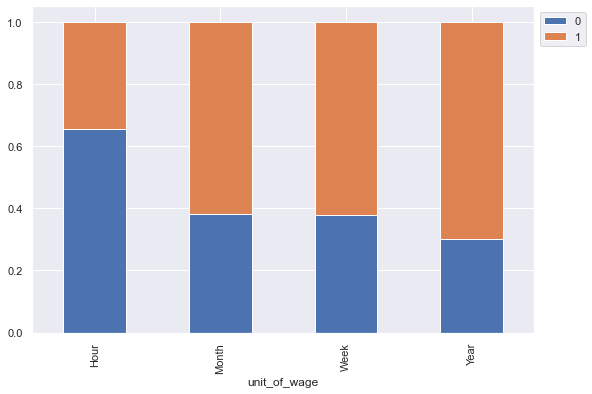

<IPython.core.display.Javascript object>

In [38]:
# plot stacked barplot of unit of wage vs case status
stacked_barplot(df, "unit_of_wage", "case_status")

* Year had the highest proportion of certification, followed by week, month, then hour
* A large majority of applicants entered year as unit of wage.
* Second most common unit of wage entered was hour, followed by week, then month

case_status            0      1    All
full_time_position                    
All                 8462  17018  25480
1                   7610  15163  22773
0                    852   1855   2707
------------------------------------------------------------------------------------------------------------------------


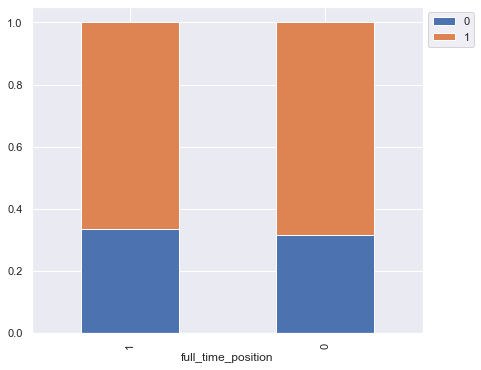

<IPython.core.display.Javascript object>

In [39]:
# plot stacked barplot of full_time_position vs case_status
stacked_barplot(df, "full_time_position", "case_status")

* A large majority of applicants were applying for Visas with full-time positions
* Full-time positions had a slightly lower proportion of certified Visas, but much higher absolute number

## Multivariate analysis

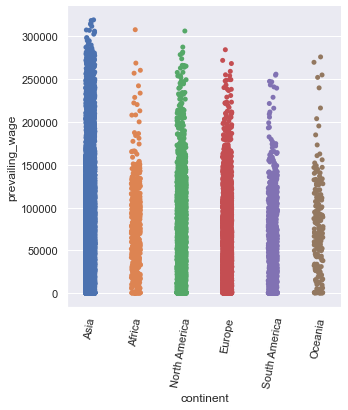

<IPython.core.display.Javascript object>

In [40]:
# plot continent vs prevailing wage
g = sns.catplot(data=df, x="continent", y="prevailing_wage")
g.set_xticklabels(rotation=80)

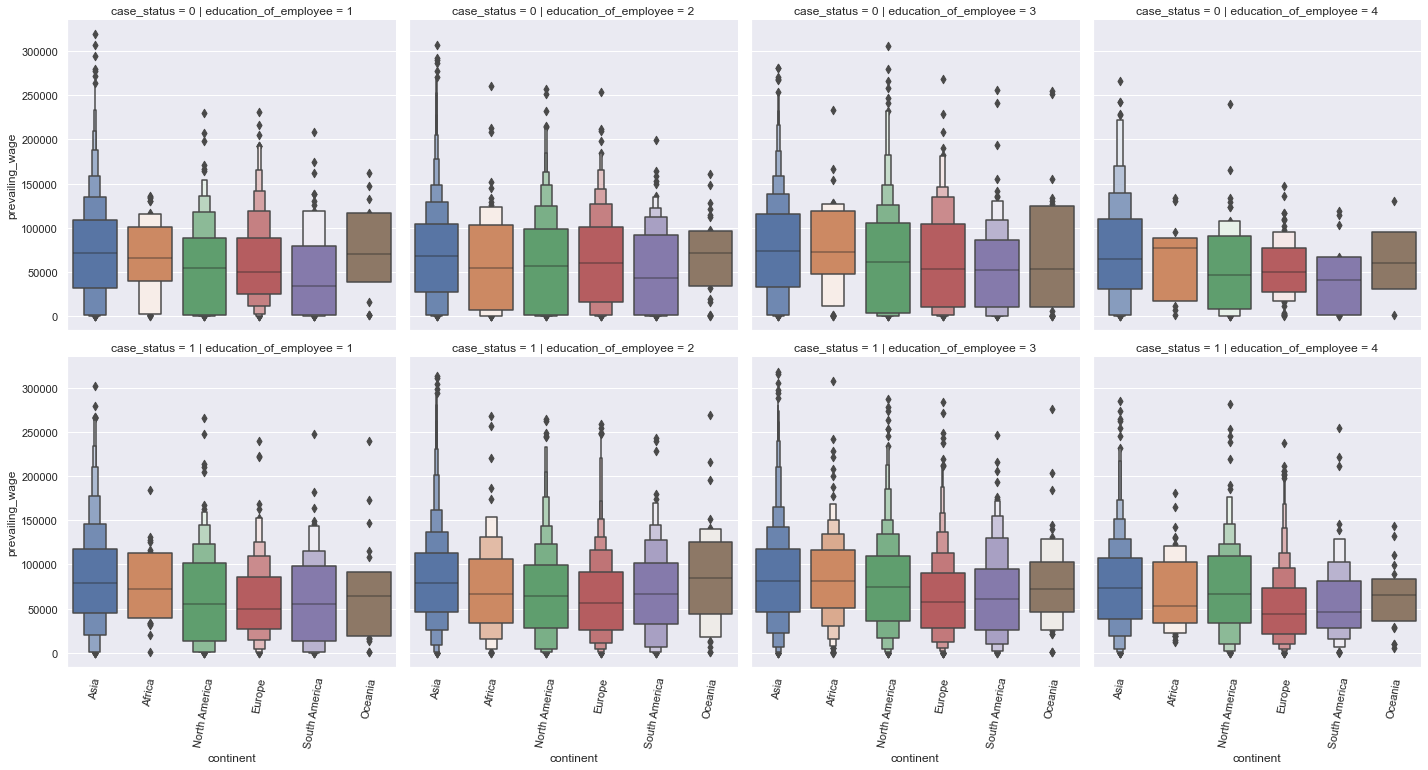

<IPython.core.display.Javascript object>

In [41]:
# plot continent vs prevailing wage vs education vs case status
g = sns.catplot(
    data=df,
    x="continent",
    y="prevailing_wage",
    col="education_of_employee",
    row="case_status",
    kind="boxen",
)
g.set_xticklabels(rotation=80)

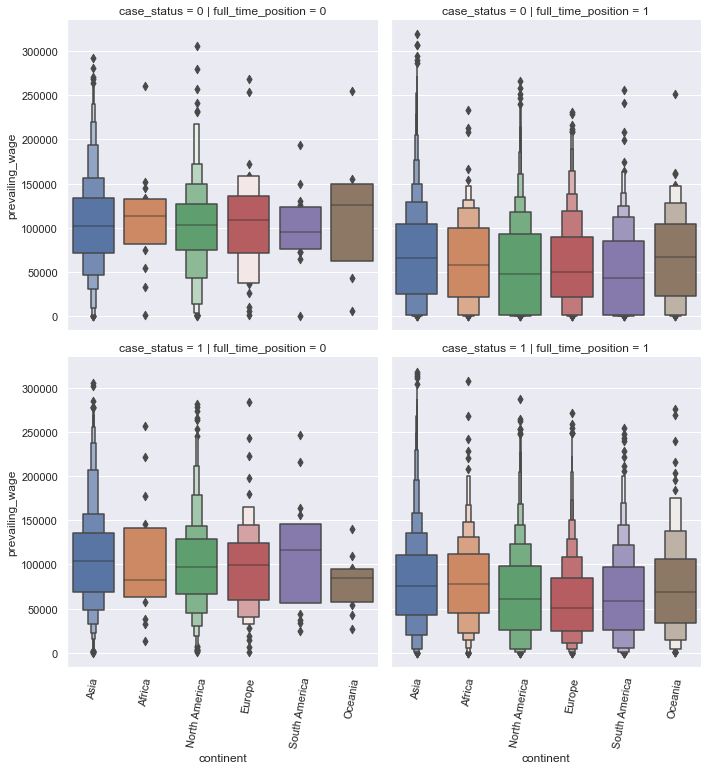

<IPython.core.display.Javascript object>

In [42]:
# plot case status vs full time position vs prevailing wage vs continent
g = sns.catplot(
    data=df,
    col="full_time_position",
    y="prevailing_wage",
    x="continent",
    row="case_status",
    kind="boxen",
)
g.set_xticklabels(rotation=80)

## Data preprocessing cont'd
* There are some applications where number of employees is less than zero. These appear to be in error so these values will be treated and will be clipped to have a minimum of 0
* Prevailing wage reported needs to be checked
* The current poverty guideline for the US is 12880
* Create dummy variables

### Number of Employees

In [43]:
# change smallest number of employees to be zero
df["no_of_employees"] = np.clip(df["no_of_employees"], 0, df["no_of_employees"].max())
# check descriptive statistics of no_of_employees
df["no_of_employees"].describe()

count     25480.000000
mean       5667.066209
std       22877.923141
min           0.000000
25%        1022.000000
50%        2109.000000
75%        3504.000000
max      602069.000000
Name: no_of_employees, dtype: float64

<IPython.core.display.Javascript object>

### Prevailing Wage

In [44]:
poverty = 12880

<IPython.core.display.Javascript object>

In [45]:
# explore descriptive statistics of prevailing wages below poverty guideline
df_low_wage = df[df["prevailing_wage"] < poverty]
df_low_wage.sample(n=10)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14381,EZYV14382,Asia,1,0,0,4096,2005,South,100.1400,Hour,1,0
25325,EZYV25326,Asia,3,0,0,2899,1975,Northeast,348.9715,Hour,1,0
8670,EZYV8671,Asia,1,1,0,2524,1991,South,113.0900,Hour,1,0
16774,EZYV16775,Asia,2,0,0,71103,1915,South,364.1964,Hour,1,0
23115,EZYV23116,Europe,2,1,0,1526,1839,West,45.0484,Hour,1,0
22480,EZYV22481,Asia,3,0,0,3450,1868,South,102.7000,Hour,1,0
5405,EZYV5406,Asia,3,1,0,1231,2000,South,101.5600,Hour,1,1
23344,EZYV23345,Europe,4,0,0,882,2013,Northeast,6574.3900,Year,1,1
2690,EZYV2691,Europe,3,1,1,2440,1995,Northeast,5088.8100,Year,1,1
13253,EZYV13254,Europe,2,1,0,2834,1986,West,8018.8500,Year,1,1


<IPython.core.display.Javascript object>

In [46]:
# subset the df_low_wage subset for those below the poverty guideline and full-time
df_poverty = df_low_wage[
    (df_low_wage["unit_of_wage"] == "Year") & (df_low_wage["full_time_position"] == 1)
]
df_poverty["prevailing_wage"].describe()

count     1307.000000
mean      6584.590964
std       3737.943171
min        100.000000
25%       3425.315000
50%       6679.430000
75%       9830.545000
max      12844.970000
Name: prevailing_wage, dtype: float64

<IPython.core.display.Javascript object>

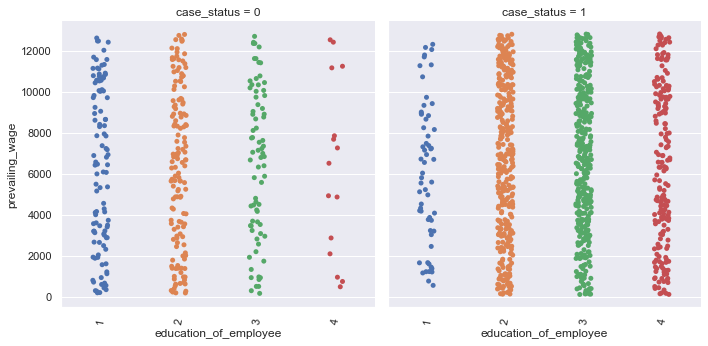

<IPython.core.display.Javascript object>

In [47]:
# plot prevailing wage of poverty line subset w.r.t. case status and education
g = sns.catplot(
    data=df_poverty,
    x="education_of_employee",
    y="prevailing_wage",
    col="case_status",
    kind="strip",
)
g.set_xticklabels(rotation=80)

It seems unlikely that someone would be applying for a Visa with a job that pays below poverty guideline, especially for higher educated employees.

Checking the Foreign Labor Certification Data Center Online Wage Library (https://www.flcdatacenter.com/download.aspx) for the data reported in 2016, the prevailing wages are greater than or equal to 7.31, which is higher than the minimum prevailing wage in our data set. So we will assume values less than 7.31 are in error and change them to 7.31. On the other hand, the maximum from the same data was 290690, which is less than this data set's maximum and so we will change larger values to 290690.

In [48]:
# clip the prevailing_wage column to ensure the minimum value is 7.31 and the maximum value is 290690
df["prevailing_wage"] = np.clip(df["prevailing_wage"], 7.31, 290690)
# check descriptive statistics
df["prevailing_wage"].describe()

count     25480.000000
mean      74445.602022
std       52772.248096
min           7.310000
25%       34015.480000
50%       70308.210000
75%      107735.512500
max      290690.000000
Name: prevailing_wage, dtype: float64

<IPython.core.display.Javascript object>

In [49]:
# explore descriptive statistics of hourly wage applications
df_hour = df[df["unit_of_wage"] == "Hour"]
df_hour.describe().T

,count,mean,std,min,25%,50%,75%,max
education_of_employee,2157.0,2.223459,0.793145,1.00,2.0000,2.0000,3.0000,4.0000
has_job_experience,2157.0,0.367177,0.482147,0.00,0.0000,0.0000,1.0000,1.0000
requires_job_training,2157.0,0.032916,0.178458,0.00,0.0000,0.0000,0.0000,1.0000
no_of_employees,2157.0,4221.807603,14847.417759,0.00,877.0000,1836.0000,2974.0000,288512.0000
yr_of_estab,2157.0,1973.943904,45.896877,1807.00,1968.0000,1993.0000,2003.0000,2016.0000
prevailing_wage,2157.0,414.584785,274.993761,7.31,152.7003,372.6523,637.3111,999.9195
full_time_position,2157.0,0.991191,0.093461,0.00,1.0000,1.0000,1.0000,1.0000
case_status,2157.0,0.346314,0.475905,0.00,0.0000,0.0000,1.0000,1.0000


<IPython.core.display.Javascript object>

Based on a 40-hour work week (most of these positions are full-time) and 48 work weeks per year, the prevailing wage for the hourly wage applications do not seem reasonable. Most of the wages seem way too high and the minimum is much too low.

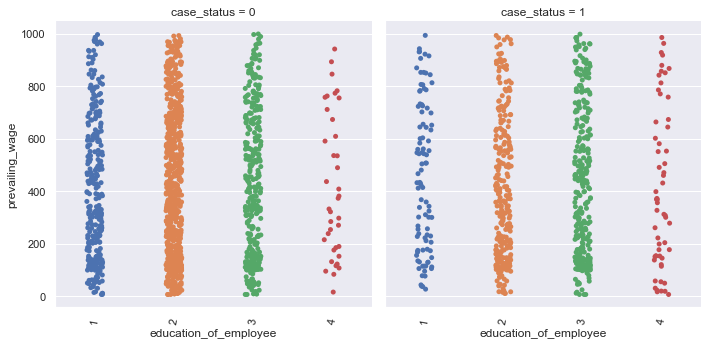

<IPython.core.display.Javascript object>

In [50]:
# from hourly unit of wage subset plot education vs wage vs case status
g = sns.catplot(
    data=df_hour,
    x="education_of_employee",
    y="prevailing_wage",
    col="case_status",
    kind="strip",
)
g.set_xticklabels(rotation=80)

In [51]:
# explore descriptive statistics of  weekly wage applications
df_week = df[df["unit_of_wage"] == "Week"]
df_week.describe().T

,count,mean,std,min,25%,50%,75%,max
education_of_employee,272.0,2.330882,0.719319,1.00,2.0000,2.00,3.00,4.00
has_job_experience,272.0,0.731618,0.443934,0.00,0.0000,1.00,1.00,1.00
requires_job_training,272.0,0.018382,0.134577,0.00,0.0000,0.00,0.00,1.00
no_of_employees,272.0,6582.580882,26231.867394,64.00,1019.0000,1950.00,3338.25,278152.00
yr_of_estab,272.0,1971.323529,45.234181,1807.00,1959.7500,1991.50,2002.00,2016.00
prevailing_wage,272.0,85606.820515,44802.704810,2183.23,51408.2775,85075.82,111331.91,280175.95
full_time_position,272.0,0.963235,0.188530,0.00,1.0000,1.00,1.00,1.00
case_status,272.0,0.621324,0.485951,0.00,0.0000,1.00,1.00,1.00


<IPython.core.display.Javascript object>

Based on 48 work weeks per year, the prevailing wage for the weekly wage applications do not seem reasonable. Most of the wages seem way too high.

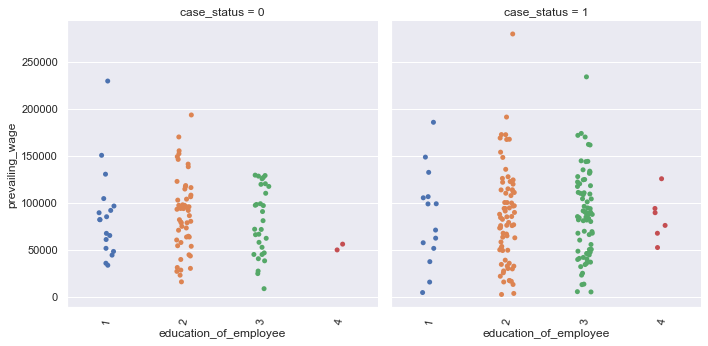

<IPython.core.display.Javascript object>

In [52]:
# from weekly unit of wage subset plot education vs wage vs case status
g = sns.catplot(
    data=df_week,
    x="education_of_employee",
    y="prevailing_wage",
    col="case_status",
    kind="strip",
)
g.set_xticklabels(rotation=80)

In [53]:
# explore descriptive statistics of  monthly wage applications
df_month = df[df["unit_of_wage"] == "Month"]
df_month.describe().T

,count,mean,std,min,25%,50%,75%,max
education_of_employee,89.0,2.303371,0.789195,1.00,2.00,2.00,3.0,4.00
has_job_experience,89.0,0.640449,0.482588,0.00,0.00,1.00,1.0,1.00
requires_job_training,89.0,0.044944,0.208355,0.00,0.00,0.00,0.0,1.00
no_of_employees,89.0,2759.595506,4529.557952,46.00,879.00,2101.00,3014.0,36511.00
yr_of_estab,89.0,1973.516854,48.427808,1819.00,1967.00,1995.00,2004.0,2013.00
prevailing_wage,89.0,87592.864045,59525.124924,1599.28,44986.24,81826.01,121629.6,264362.95
full_time_position,89.0,0.943820,0.231573,0.00,1.00,1.00,1.0,1.00
case_status,89.0,0.617978,0.488635,0.00,0.00,1.00,1.0,1.00


<IPython.core.display.Javascript object>

Based on 12 work months per year, the prevailing wage for the monthly wage applications do not seem reasonable. Most of the wages seem way too high.

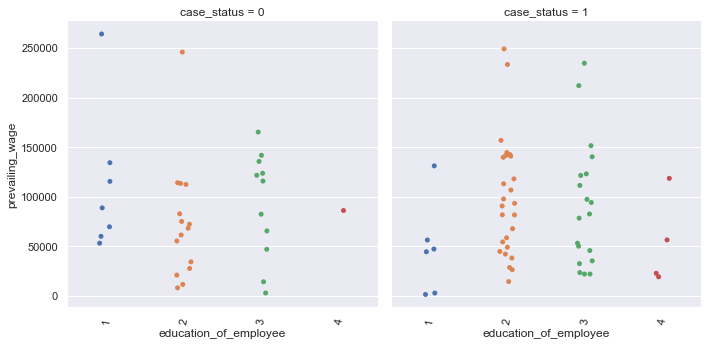

<IPython.core.display.Javascript object>

In [54]:
# from monthly unit of wage subset plot education vs wage vs case status
g = sns.catplot(
    data=df_month,
    x="education_of_employee",
    y="prevailing_wage",
    col="case_status",
    kind="strip",
)
g.set_xticklabels(rotation=80)

<font color='turquoise'>Since applications with hourly, weekly, and monthly wage units selected do not seem to have reliable data for prevailing wage, we will try to fit a model without prevailing wage entirely (keeping unit of wage), and we will try to fit a model with the prevailing wage of just the yearly wage unit.</font>

## Dummy variables

In [55]:
# create dummy variables for one-hot encoding
oneHotCols = [
    "continent",
    "has_job_experience",
    "requires_job_training",
    "region_of_employment",
    "unit_of_wage",
    "full_time_position",
]
df = pd.get_dummies(df, columns=oneHotCols, drop_first=True)
df.head()

,case_id,education_of_employee,no_of_employees,yr_of_estab,prevailing_wage,case_status,continent_Asia,continent_Europe,continent_North America,continent_Oceania,...,has_job_experience_1,requires_job_training_1,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_1
0,EZYV01,1,14513,2007,592.2029,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,EZYV02,3,2412,2002,83425.6500,1,1,0,0,0,...,1,0,0,1,0,0,0,0,1,1
2,EZYV03,2,44444,2008,122996.8600,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,1
3,EZYV04,2,98,1897,83434.0300,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,EZYV05,3,1082,2005,149907.3900,1,0,0,0,0,...,1,0,0,0,1,0,0,0,1,1


<IPython.core.display.Javascript object>

## Split the dataset

In [56]:
# separate features (omitting case_id) and the target column
X = df.drop(["case_id", "case_status"], axis=1)
y = df["case_status"]

<IPython.core.display.Javascript object>

In [57]:
# splitting the data into train and test sets with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1, shuffle=True, stratify=y
)
print(X_train.shape, X_test.shape)

(17836, 19) (7644, 19)


<IPython.core.display.Javascript object>

* We have 17,836 observations in the train set and 7,644 observations in the test set

In [58]:
# check distribution of classes in target variable, split into train and test sets
print(y.value_counts(1))
print("*" * 50)
print(y_test.value_counts(1))
print("*" * 50)
print(y_train.value_counts(1))

1    0.667896
0    0.332104
Name: case_status, dtype: float64
**************************************************
1    0.667844
0    0.332156
Name: case_status, dtype: float64
**************************************************
1    0.667919
0    0.332081
Name: case_status, dtype: float64


<IPython.core.display.Javascript object>

* distribution of classes in target variable is consistent throughout train and test sets

## Model evaluation criterion

### The model can make wrong predictions as:
1. Predicting an application for Visa should be certified when it should be denied.
2. Prediction an application for Visa should be denied when it should be certified.

### Which case is more important?
1. If the model predicts an application should be certified when it should be denied, the OFLC is allowing a foreigner to enter the country to fill a role that should be filled by US workers, contributing to an increase in unemployment.
2. If the model predicts an application should be denied when it should be certified, there is a vacancy for an employment position that cannot be filled by US workers due to workforce shortages. 

### Which metric to optimize?
* We should try to maximize F1-score in order to increase the chances of predicting both the classes correctly.

## Define function to evaluate models

* to provide metrics on the train and test sets 
* to show the confusion matrix

In [59]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [60]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Decision Tree Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Test performance:
    Accuracy    Recall  Precision        F1
0   0.66248  0.743193   0.749358  0.746263


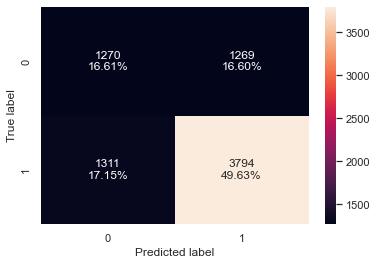

<IPython.core.display.Javascript object>

In [61]:
# fit the model
dTree1 = DecisionTreeClassifier(random_state=1)
dTree1.fit(X_train, y_train)

# calculate the metrics
dTree1_model_train_perf = model_performance_classification_sklearn(
    dTree1, X_train, y_train
)
print("Training performance:\n", dTree1_model_train_perf)
dTree1_model_test_perf = model_performance_classification_sklearn(
    dTree1, X_test, y_test
)
print("Test performance:\n", dTree1_model_test_perf)

# create confusion matrix
confusion_matrix_sklearn(dTree1, X_test, y_test)

* The decision tree is overfitting the data, as training performance is perfect and test performance is much lower in each category
* Let's try hyperparameter tuning to see if model performance improves

### Feature importance of Decision Tree

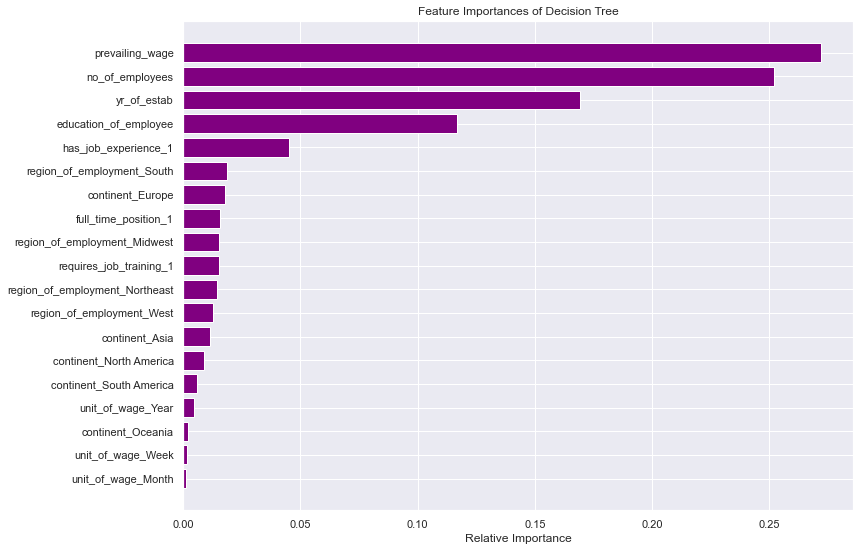

<IPython.core.display.Javascript object>

In [62]:
# plot feature importances
feature_names = X_train.columns
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 9))
plt.title("Feature Importances of Decision Tree")
plt.barh(range(len(indices)), importances[indices], color="purple", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.savefig("Feat_Imp_DT.jpg", bbox_inches="tight")
plt.show()

* Prevailing wage is the most important feature, followed by number of employees and year of establishment, according to the decision tree

### Hyperparameter Tuning - DT

In [63]:
# choose the type of classifier
dTree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 11, 2),
    "min_samples_leaf": np.arange(1, 12, 2),
    "max_leaf_nodes": [2, 3, 5, 10],
    "min_impurity_decrease": [0.0001, 0.001, 0.01, 0.1],
}

# type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# run the grid search
grid_obj = GridSearchCV(dTree_estimator, parameters, scoring=scorer, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# set the clf to the best combination of parameters
dTree_estimator = grid_obj.best_estimator_

# fit the best algorithm to the data
dTree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, max_leaf_nodes=10,
                       min_impurity_decrease=0.0001, random_state=1)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1
0  0.716192  0.778477   0.792853  0.785599
Test performance:
    Accuracy    Recall  Precision        F1
0  0.714678  0.780803    0.78962  0.785187


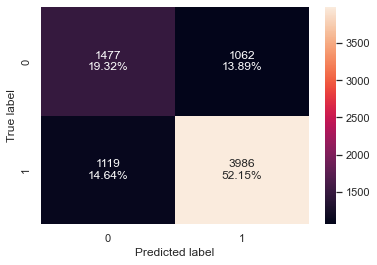

<IPython.core.display.Javascript object>

In [64]:
# calculate different metrics
dTree_estimator_model_train_perf = model_performance_classification_sklearn(
    dTree_estimator, X_train, y_train
)
print("Training performance:\n", dTree_estimator_model_train_perf)
dTree_estimator_model_test_perf = model_performance_classification_sklearn(
    dTree_estimator, X_test, y_test
)
print("Test performance:\n", dTree_estimator_model_test_perf)

# create confusion matrix
confusion_matrix_sklearn(dTree_estimator, X_test, y_test)

* The overfitting has reduced significantly
* Test performance has improved across the board
* Let's try other models

### Feature importance of Tuned Decision Tree

In [65]:
# text report showing the rules of a decision tree
feature_names = list(X_train.columns)
print(tree.export_text(dTree_estimator, feature_names=feature_names, show_weights=True))

|--- education_of_employee <= 2.50
|   |--- education_of_employee <= 1.50
|   |   |--- weights: [2419.59, 607.11] class: 0
|   |--- education_of_employee >  1.50
|   |   |--- prevailing_wage <= 973.93
|   |   |   |--- weights: [779.93, 153.46] class: 0
|   |   |--- prevailing_wage >  973.93
|   |   |   |--- has_job_experience_1 <= 0.50
|   |   |   |   |--- weights: [1719.46, 1095.19] class: 0
|   |   |   |--- has_job_experience_1 >  0.50
|   |   |   |   |--- weights: [1580.94, 2063.87] class: 1
|--- education_of_employee >  2.50
|   |--- has_job_experience_1 <= 0.50
|   |   |--- unit_of_wage_Year <= 0.50
|   |   |   |--- weights: [350.82, 119.78] class: 0
|   |   |--- unit_of_wage_Year >  0.50
|   |   |   |--- continent_Europe <= 0.50
|   |   |   |   |--- weights: [1233.13, 1262.88] class: 1
|   |   |   |--- continent_Europe >  0.50
|   |   |   |   |--- weights: [93.35, 347.35] class: 1
|   |--- has_job_experience_1 >  0.50
|   |   |--- prevailing_wage <= 951.68
|   |   |   |--- weight

<IPython.core.display.Javascript object>

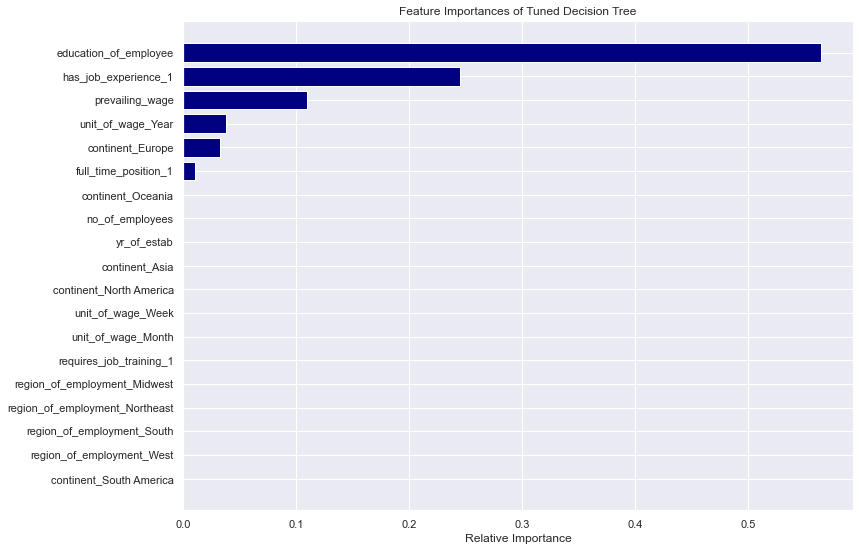

<IPython.core.display.Javascript object>

In [66]:
# plot feature importances
feature_names = X_train.columns
importances = dTree_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 9))
plt.title("Feature Importances of Tuned Decision Tree")
plt.barh(range(len(indices)), importances[indices], color="navy", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.savefig("Feat_Imp_DT_tuned.jpg", bbox_inches="tight")
plt.show()

* Education of employee is the most important feature, followed by job experience and prevailing wage, according to the tuned decision tree

## Random Forest Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Test performance:
    Accuracy    Recall  Precision        F1
0  0.725144  0.837414   0.770826  0.802742


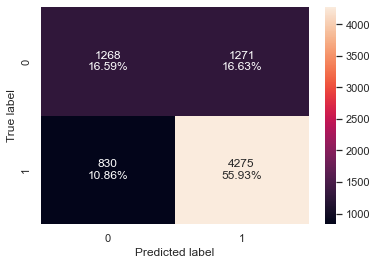

<IPython.core.display.Javascript object>

In [67]:
# fit the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train, y_train)

# calculate different metrics
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_train, y_train
)
print("Training performance:\n", rf_estimator_model_train_perf)
rf_estimator_model_test_perf = model_performance_classification_sklearn(
    rf_estimator, X_test, y_test
)
print("Test performance:\n", rf_estimator_model_test_perf)

# create confusion matrix
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

* Random forest is giving a higher test F1-score than the tuned decision tree but it is overfitting the training data
* Let's try hyperparameter tuning and see if the model performance improves

### Feature importance of Random Forest Classifier

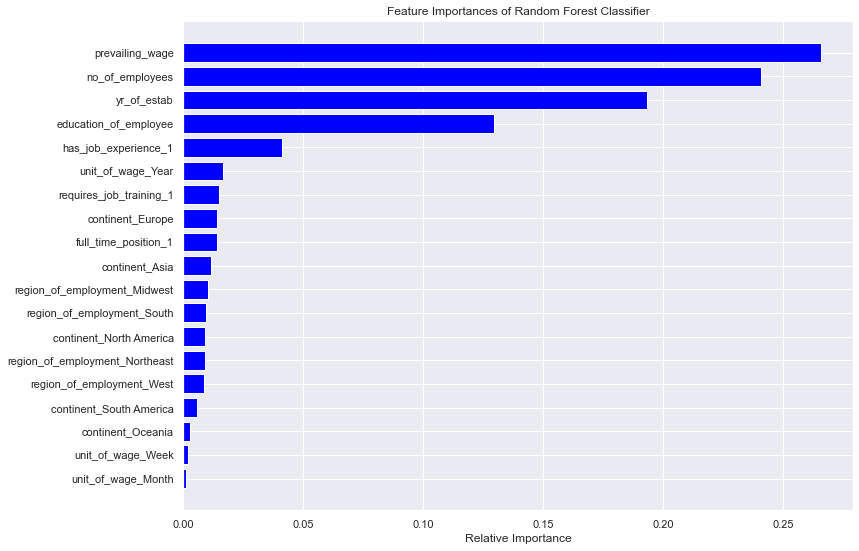

<IPython.core.display.Javascript object>

In [68]:
# plot feature importances
feature_names = X_train.columns
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 9))
plt.title("Feature Importances of Random Forest Classifier")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.savefig("Feat_Imp_RF.jpg", bbox_inches="tight")
plt.show()

* Prevailing wage is the most important feature, followed by number of employees and year of establishment, according to the random forest classifier

### Hyperparameter Tuning - RF

In [ ]:
# choose the type of classifier
rf_tuned = RandomForestClassifier(
    class_weight="balanced", random_state=1, bootstrap=True
)

# parameters to choose from
parameters = {
    "max_depth": list(np.arange(5, 30, 5)) + [None],
    "max_features": ["sqrt", "log2", None],
    "min_samples_leaf": np.arange(1, 15, 5),
    "min_samples_split": np.arange(2, 20, 5),
    "n_estimators": np.arange(10, 110, 10),
}

# type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train.values, y_train)

# set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# fit the best algorithm to the data
rf_tuned.fit(X_train.values, y_train)

In [ ]:
# calculate different metrics
rf_tuned_model_train_perf = model_performance_classification_sklearn(
    rf_tuned, X_train, y_train
)
print("Training performance:\n", rf_tuned_model_train_perf)
rf_tuned_model_test_perf = model_performance_classification_sklearn(
    rf_tuned, X_test, y_test
)
print("Testing performance:\n", rf_tuned_model_test_perf)

# create confusion matrix
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

* Again, we are getting a good test F1-score than the tuned decision tree but it is overfitting the training data

### Feature importance of Tuned Random Forest Classifier

In [ ]:
# plot feature importances
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 9))
plt.title("Feature Importances of Tuned Random Forest Classifier")
plt.barh(range(len(indices)), importances[indices], color="teal", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.savefig("Feat_Imp_RF_tuned.jpg", bbox_inches="tight")
plt.show()

* Prevailing wage is the most important factor, followed by number of employees and year of establishment, according to the tune random forest classifier

## Bagging Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0   0.98318  0.984723   0.990041  0.987375
Test performance:
    Accuracy    Recall  Precision        F1
0  0.695317  0.769246   0.773336  0.771285


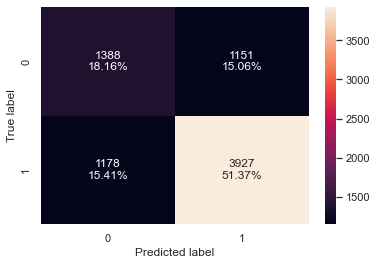

<IPython.core.display.Javascript object>

In [72]:
# fit the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)

# calculate different metrics
bagging_classifier_model_train_perf = model_performance_classification_sklearn(
    bagging_classifier, X_train, y_train
)
print("Training performance:\n", bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf = model_performance_classification_sklearn(
    bagging_classifier, X_test, y_test
)
print("Test performance:\n", bagging_classifier_model_test_perf)

# create confusion matrix
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

* Still overfitting while the test F1 score is not better than the hypertuned decision tree

### Hyperparameter Tuning - BC

In [ ]:
# choose the type of classifier
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "n_estimators": [10, 20, 30, 40, 50],
}

# type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train.values, y_train)

# set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train.values, y_train)

In [ ]:
# calculate different metrics
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_train, y_train
)
print("Training performance:\n", bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_test, y_test
)
print("Test performance:\n", bagging_estimator_tuned_model_test_perf)

# create confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

* Overfitting is not as severe as Random Forest, but still quite a bit of overfitting
* Test F1-score is the best so far

## AdaBoost Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.737778  0.889868   0.759058  0.819274
Test performance:
    Accuracy   Recall  Precision        F1
0  0.732993  0.88619   0.756016  0.815944


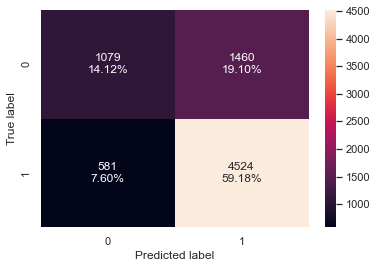

<IPython.core.display.Javascript object>

In [74]:
# fit the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train, y_train)

# calculate different metrics
ab_classifier_model_train_perf = model_performance_classification_sklearn(
    ab_classifier, X_train, y_train
)
print("Training performance:\n", ab_classifier_model_train_perf)
ab_classifier_model_test_perf = model_performance_classification_sklearn(
    ab_classifier, X_test, y_test
)
print("Test performance:\n", ab_classifier_model_test_perf)

# create confusion matrix
confusion_matrix_sklearn(ab_classifier, X_test, y_test)

* The model is not overfitting the data and the F1-score is the best yet

### Feature importance of AdaBoost Classifier

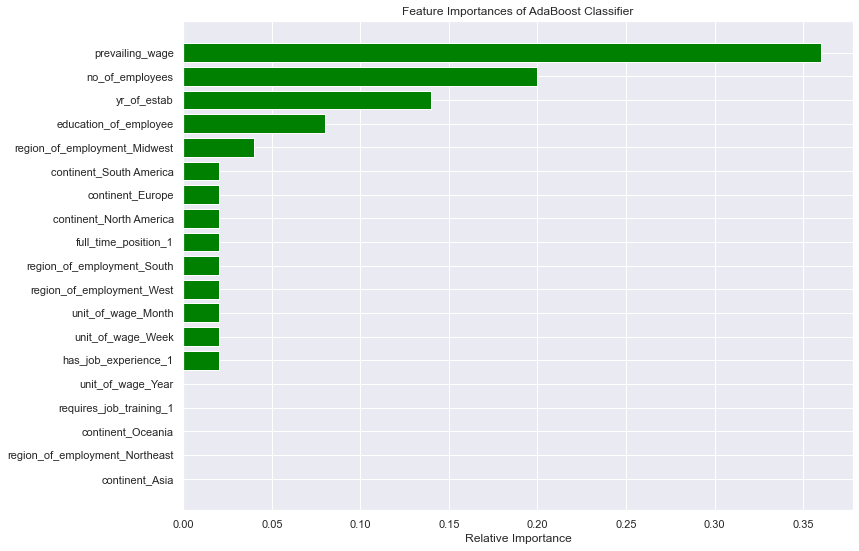

<IPython.core.display.Javascript object>

In [75]:
# plot feature importances
feature_names = X_train.columns
importances = ab_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 9))
plt.title("Feature Importances of AdaBoost Classifier")
plt.barh(range(len(indices)), importances[indices], color="green", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.savefig("Feat_Imp_AB.jpg", bbox_inches="tight")
plt.show()

* Prevailing wage is the most important feature, followed by number of employees and year of establishment, according to the AdaBoost classifier

### Hyperparameter Tuning - ABC

In [ ]:
# choose the type of classifier
abc_tuned = AdaBoostClassifier(random_state=1)

# grid of parameters to choose from
parameters = {
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1),
        DecisionTreeClassifier(max_depth=2),
        DecisionTreeClassifier(max_depth=3),
    ],
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": np.arange(0.1, 2, 0.1),
}

# type of scoring used to compared parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# fit the best algorithm to the data
abc_tuned.fit(X_train, y_train)

KeyboardInterrupt: 

<IPython.core.display.Javascript object>

In [ ]:
# calculate different metrics
abc_tuned_model_train_perf = model_performance_classification_sklearn(
    abc_tuned, X_train, y_train
)
print("Training performance:\n", abc_tuned_model_train_perf)
abc_tuned_model_test_perf = model_performance_classification_sklearn(
    abc_tuned, X_test, y_test
)
print("Test performance:\n", abc_tuned_model_test_perf)

# create confusion matrix
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

* The model is not overfitting the data and the F1-score is the best yet

### Feature importance of Tuned AdaBoost Classifier

In [ ]:
# plot feature importances
feature_names = X_train.columns
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 9))
plt.title("Feature Importances of Tuned AdaBoost Classifier")
plt.barh(range(len(indices)), importances[indices], color="chartreuse", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.savefig("Feat_Imp_AB_tuned.jpg", bbox_inches="tight")
plt.show()

* Education of employee is the most important feature, followed by prevailing wage and job experience, according to the tuned AdaBoost Classifier

## Gradient Boosting Classifier

In [ ]:
# fit the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train, y_train)

# calculate different metrics
gb_classifier_model_train_perf = model_performance_classification_sklearn(
    gb_classifier, X_train, y_train
)
print("Training performance:\n", gb_classifier_model_train_perf)
gb_classifier_model_test_perf = model_performance_classification_sklearn(
    gb_classifier, X_test, y_test
)
print("Testing performance:\n", gb_classifier_model_test_perf)

# create confusion matrix
confusion_matrix_sklearn(gb_classifier, X_test, y_test)

* The model is not overfitting the data and the F1-score is the best yet

### Feature importance of Gradient Boost Classifier

In [ ]:
# plot feature importances
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 9))
plt.title("Feature Importances of Gradient Boost Classifier")
plt.barh(range(len(indices)), importances[indices], color="gold", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.savefig("Feat_Imp_GB.jpg", bbox_inches="tight")
plt.show()

* Education of employee is the most important feature, followed by job experience and prevailing wage, according to the gradient boosting classifier

### Hyperparameter Tuning - GBC

In [ ]:
# choose the type of classifier
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# grid of parameters to choose from
parameters = {
    "n_estimators": [100, 150, 200, 250],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
}

# type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

In [ ]:
# calculate different metrics
gbc_tuned_model_train_perf = model_performance_classification_sklearn(
    gbc_tuned, X_train, y_train
)
print("Training performance:\n", gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf = model_performance_classification_sklearn(
    gbc_tuned, X_test, y_test
)
print("Testing performance:\n", gbc_tuned_model_test_perf)

# create confusion matrix
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

* Test F1-score is slightly better and model is not overfit

### Feature importance of Tuned Gradient Boost Classifier

In [ ]:
# plot feature importances
feature_names = X_train.columns
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 9))
plt.title("Feature Importances of Tuned Gradient Boost Classifier")
plt.barh(range(len(indices)), importances[indices], color="goldenrod", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.savefig("Feat_Imp_GB_tuned.jpg", bbox_inches="tight")
plt.show()

* Education of employee is the most important feature, followed by job experience and prevailing wage, according to the tuned gradient boost classifier

## XGBoost Classifier

In [ ]:
# fit the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric="logloss")
xgb_classifier.fit(X_train, y_train)

# calculate different metrics
xgb_classifier_model_train_perf = model_performance_classification_sklearn(
    xgb_classifier, X_train, y_train
)
print("Training performance:\n", xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf = model_performance_classification_sklearn(
    xgb_classifier, X_test, y_test
)
print("Testing performance:\n", xgb_classifier_model_test_perf)

# create confusion matrix
confusion_matrix_sklearn(xgb_classifier, X_test, y_test)

* Model is overfitting the data somewhat and F1-score is good but not better than AdaBoost Classifier or Gradient Boosting Classifier

### Feature importance of XGBoost Classifier

In [ ]:
# plot feature importances
feature_names = X_train.columns
importances = xgb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 9))
plt.title("Feature Importances of XGBoost Classifier")
plt.barh(range(len(indices)), importances[indices], color="tomato", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.savefig("Feat_Imp_XGB.jpg", bbox_inches="tight")
plt.show()

* Education of employee is the most important feature, followed by job experience and the yearly unit of wage, according to the XGBoost Classifier

### Hyperparameter Tuning - XGB

In [ ]:
# choose the type of classifier
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# grid of parameters to choose from
parameters = {
    "n_estimators": [10, 30, 50],
    "scale_pos_weight": [1, 2, 5],
    "subsample": [0.7, 0.9, 1],
    "learning_rate": [0.05, 0.1, 0.2],
    "colsample_bytree": [0.7, 0.9, 1],
    "colsample_bylevel": [0.5, 0.7, 1],
}

# type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

In [ ]:
# calculate different metrics
xgb_tuned_model_train_perf = model_performance_classification_sklearn(
    xgb_tuned, X_train, y_train
)
print("Training performance:\n", xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf = model_performance_classification_sklearn(
    xgb_tuned, X_test, y_test
)
print("Testing performance:\n", xgb_tuned_model_test_perf)

# create confusion matrix
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

* Slightly overfit but test F1-score is slightly better than AdaBoost Classifier

### Feature importance of Tuned XGBoost

In [ ]:
# plot feature importances
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 9))
plt.title("Feature Importances of Tuned XGBoost")
plt.barh(range(len(indices)), importances[indices], color="firebrick", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.savefig("Feat_Imp_XGB_tuned.jpg", bbox_inches="tight")
plt.show()

* Education of employee is the most important feature, followed by job experience and being from Europe, according to the tuned XGBoost model

## Stacking Classifier

In [ ]:
# identify the estimators
estimators = [
    ("AdaBoost", abc_tuned),
    ("Gradient Boosting", gbc_tuned),
    ("Decision Tree", dTree_estimator),
]

# identify the final estimator
final_estimator = xgb_tuned

# choose the type of classifier
stacking_classifier = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator
)

# fit the stacking classifier
stacking_classifier.fit(X_train, y_train)

In [ ]:
# calculate different metrics
stacking_classifier_model_train_perf = model_performance_classification_sklearn(
    stacking_classifier, X_train, y_train
)
print("Training performance:\n", stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf = model_performance_classification_sklearn(
    stacking_classifier, X_test, y_test
)
print("Testing performance:\n", stacking_classifier_model_test_perf)

# create confusion matrix
confusion_matrix_sklearn(stacking_classifier, X_test, y_test)

* Not overfitting training data
* Test performance F1-score high but not better than Gradient Boosting

## Comparing all models

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dTree1_model_train_perf.T,
        dTree_estimator_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adaboost Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        dTree1_model_test_perf.T,
        dTree_estimator_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

## Conclusions
* Based on our analysis, we can say Visa certification has the following features in comparison to Visa denial:
    * high employee education level
    * high prevailing wage
    * has job experience
    * full-time position
    * Europe continent
    * year unit of wage
    * midwest region of employment
* Once a certifiable applicant is identified from the model, OFLC can use it to identify Visa applications to certify, which would help reduce the cost and increase efficiency
* Need to consult an expert on prevailing wage and unit of wage as some details were not clear
* It seems unlikely that someone would be applying for a Visa with a job that pays below poverty guideline, especially for higher educated employees. Companies often pay immigrants higher wages due to lack of skilled US workers available to fill positions. However skilled immigrants sometimes fill positions below their education level or well below their earning potential because they may be forced to settle for lower-skill positions.